In [1]:
# https://www.linkedin.com/pulse/nlp-a-complete-guide-topic-modeling-latent-dirichlet-sahil-m/

# Extract topics from unstructured data
# - cluster of words by topic
# - cluster of document by topic

One of the primary applications of natural language processing is to automatically extract what topics people are discussing from large volumes of text. Some examples of large text could be feeds from social media, customer reviews of hotels, movies, etc, user feedbacks, news stories, e-mails of customer complaints etc.

Topic modelling unsupervised learning (PCA k-Means, Topic modelling)

 Topic modeling Use Cases:

* Document categorization
* Document summarization
* Dimension reduction- Doc words matrix is reduced to doc topic matrix

In [1]:
import re
import nltk
import spacy
import gensim
import pyLDAvis
import nlp
nltk.download('stopwords')
import pandas as pd
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for Lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lilakelland/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data/bbc-text.csv')
df.head()

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [3]:
# preprocessing data
# remove emails, newline characters, stop words tokenization

data = df.text.values.tolist()

# remove emails
data = [re.sub(r'\S*@\S*\s?', "",i)for i in data]

# remove new line characters
data = [re.sub('\s+', ' ',i) for i in data]

# remove distracting single quotes
data = [re.sub("\'", "", i) for i in data]

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-3-c2866e16f0d7>:10: DeprecationWarning: invalid escape sequence \s
  data = [re.sub('\s+', ' ',i) for i in data]


In [4]:
# data


/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# need to break up and tokenize into words!

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
data_words = list(sent_to_words(data))

print(data_words[:1])

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['tv', 'future', 'in', 'the', 'hands', 'of', 'viewers', 'with', 'home', 'theatre', 'systems', 'plasma', 'high', 'definition', 'tvs', 'and', 'digital', 'video', 'recorders', 'moving', 'into', 'the', 'living', 'room', 'the', 'way', 'people', 'watch', 'tv', 'will', 'be', 'radically', 'different', 'in', 'five', 'years', 'time', 'that', 'is', 'according', 'to', 'an', 'expert', 'panel', 'which', 'gathered', 'at', 'the', 'annual', 'consumer', 'electronics', 'show', 'in', 'las', 'vegas', 'to', 'discuss', 'how', 'these', 'new', 'technologies', 'will', 'impact', 'one', 'of', 'our', 'favourite', 'pastimes', 'with', 'the', 'us', 'leading', 'the', 'trend', 'programmes', 'and', 'other', 'content', 'will', 'be', 'delivered', 'to', 'viewers', 'via', 'home', 'networks', 'through', 'cable', 'satellite', 'telecoms', 'companies', 'and', 'broadband', 'service', 'providers', 'to', 'front', 'rooms', 'and', 'portable', 'devices', 'one', 'of', 'the', 'most', 'talked', 'about', 'technologies', 'of', 'ces', 'ha

### Remove Stopwords and Lemmatize Tokens:

In [6]:
#NLTK Stop works
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

def remove_stopwords(texts):
    return[[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

# Spacy Lematization
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out =[]
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# remove stop words
data_words_nostops = remove_stopwords(data_words)

# do lemmatization keeping only noun
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=["NOUN"])

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print(data_lemmatized[:2])

[['hand', 'viewer', 'home', 'theatre', 'system', 'definition', 'tvs', 'video', 'recorder', 'living', 'room', 'way', 'people', 'tv', 'year', 'time', 'panel', 'consumer', 'electronic', 'show', 'vegas', 'technology', 'trend', 'programme', 'content', 'viewer', 'home', 'network', 'cable', 'satellite', 'telecom', 'company', 'service', 'provider', 'room', 'device', 'technology', 'video', 'recorder', 'pvr', 'box', 'sky', 'system', 'people', 'record', 'store', 'pause', 'wind', 'tv', 'programme', 'technology', 'tv', 'definition', 'tv', 'business', 'japan', 'europe', 'definition', 'programming', 'people', 'wind', 'advert', 'network', 'channel', 'schedule', 'carte', 'entertainment', 'cable', 'satellite', 'company', 'term', 'advertising', 'revenue', 'brand', 'identity', 'viewer', 'loyalty', 'channel', 'technology', 'moment', 'concern', 'europe', 'uptake', 'service', 'sky', 'today', 'month', 'year', 'time', 'adam', 'bbc', 'broadcast', 'futurologist', 'news', 'website', 'issue', 'advertising', 'reven

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 5. LDA model- Latent Dirichlet Allocation:

We are ready to apply LDA for our topic model exercise. Lets understand LDA in detail:

Latent Dirichlet Allocation (LDA) is an unsupervised Generative probabilistic machine learning technique used for extracting:

* number of topics in data(corpus)
* distribution of topics in each text(document)
* distribution of words(terms) in each topic

A topic is defined as a repeating pattern of co-occurring terms in a corpus.

The two main inputs to the LDA topic model are the dictionary and the corpus.

* Dictionary: Unique ids for each unique word
Eg:{‘able’: 0, ‘add’: 1, ‘sun’: 2, ‘great: 3, ‘away’: 4, ‘allow’: 5}

* Corpus: For each document number of times a particular word appeared(Document Term Matrix)

#### LDA Input:

1. M no. of documents

2. Each of these documents have N no. of words

3. Hyperparameters- alpha and beta

4. All of which needs to pass through LDA

#### LDA Output:

K no. of topics (cluster of words)
Document to topic distribution and Topic-term distribution

K: Number of topics

N: Number of words in the document

M: Number of documents to analyze

α : Per-document topic distribution

High α means every document is likely to contain a mixture of most of the topics and not just any single topic specifically.

Low α means A document is more likely to be represented by just few of the topic.

β : Per topic word distribution

High β means each topic is likely to contain a mixture of most of the words not just any word specifically.

Low β means topic may contain a mixture of just a few of words.

Step1: It assigns a random topic to each word.

Step2: It iterates to each word ‘w’ for each document and tries to adjust current topic-word assignment with a new assignment. A new topic ‘k’ is being assigned to the word ‘w’ with probability ‘P’ which is product of 2 probabilities; P1 and P2. So for every topic assigned to a word, there are 2 probabilities calculated.

Step3: p1=proportion of (topic ‘t’/document ‘d’) i.e proportion of words in document ‘d’ that are currently assigned to topic ‘t’.

p2= proportion of (word ‘w’/topic ‘t’) i.e proportion of assignments to topic ‘t’ that come from word ‘w’ across all docs.

LDA computes p1*p2, based upon which it finds optimal topic ‘k’ for each word ‘w’.

Step4: This is being repeated many times until a steady stage is achieved where doc topic and topic term distributions are fairly good. This is where LDA converges.

Note: LDA takes the assumption that all existing topic term distributions are correct except the current term/word. So it tries to update the term-topic assignment with a new topic having probability p1*p2.

In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
print(id2word)

# create corpus
texts = data_lemmatized

# Term Document frequency
corpus = [id2word.doc2bow(text) for text in texts]

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary(15662 unique tokens: ['adam', 'advert', 'advertising', 'bbc', 'bill']...)


## Create a base model 
and choose k

Apart from that, alpha and eta are hyperparameters that affect the sparsity of the topics. Chunk size is the number of documents to be used in each training chunk. Controls how many documents are processed at a time in the training algorithm. Increasing chunk size will speed up training.

update_every determines how often the model parameters should be updated and passes essentially controls how often we repeat a particular loop over each document.

In [10]:
# baseline model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word,
                                            num_topics=5,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            per_word_topics=True)

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We created 5 topics. You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown below

In [13]:
import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.020*"people" + 0.018*"music" + 0.017*"game" + 0.015*"phone" + 0.014*"technology" + 0.011*"network" + 0.010*"tv" + 0.009*"service" + 0.007*"video" + 0.007*"time"'),
 (1,
  '0.038*"film" + 0.016*"award" + 0.014*"year" + 0.011*"star" + 0.010*"cinema" + 0.008*"tv" + 0.008*"director" + 0.007*"dance" + 0.007*"number" + 0.007*"chart"'),
 (2,
  '0.028*"mr" + 0.014*"government" + 0.013*"party" + 0.012*"people" + 0.010*"blair" + 0.009*"minister" + 0.009*"election" + 0.007*"year" + 0.007*"labour" + 0.006*"plan"'),
 (3,
  '0.016*"year" + 0.014*"sale" + 0.012*"company" + 0.012*"firm" + 0.009*"attack" + 0.007*"market" + 0.007*"site" + 0.007*"price" + 0.007*"month" + 0.006*"bank"'),
 (4,
  '0.015*"game" + 0.013*"year" + 0.012*"player" + 0.012*"time" + 0.009*"team" + 0.008*"world" + 0.008*"england" + 0.008*"club" + 0.007*"side" + 0.007*"match"')]

#### 7.How good a given topic is - Topic Coherence 

In [16]:
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.5321836458699624


Topic coherence measures the average similarity between top words having the highest weights in a topic i.e relative distance between the top words.

Let's see if we can improve the coherence further.

#### 8. Model improvement

How to find the optimal number of topics for LDA?

The approach to finding the optimal number of topics is to build many LDA models with different values of a number of topics (k) and pick the one that gives the highest coherence value. Choosing a ‘k’ that marks the end of the rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """ compute c_v coherence for varius numener of topics using gensim dic and corpus, limit = 
    max number of topics - returns model list - list of lda topic models and corresponding 
    coherence values """
    coherence_values = []
    model_list=[]
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics,
                                                random_state=100,
                                                chunksize=200,
                                                passes=10,
                                                per_word_topics=True,
                                                id2word=id2word)
        model_list.append(model)
        coherencemodel=CoherenceModel(model=model, texts=texts,
                                      dictionary=dictionary, 
                                      coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, 
                                                        texts=data_lemmatized,
                                                        start=2,
                                                        limit=8,
                                                        step=1)

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


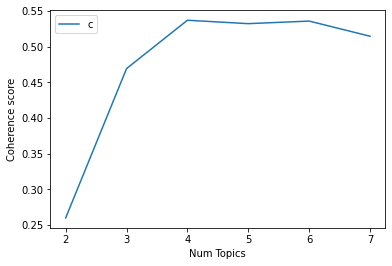

In [19]:
# show plot
limit=8; start=2; step=1;
x=range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()

In [21]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics=", m ," has Coherence Value of", round(cv,4))

Num Topics= 2  has Coherence Value of 0.2601
Num Topics= 3  has Coherence Value of 0.4692
Num Topics= 4  has Coherence Value of 0.537
Num Topics= 5  has Coherence Value of 0.5322
Num Topics= 6  has Coherence Value of 0.5358
Num Topics= 7  has Coherence Value of 0.5146


/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Have you seen the Magic above? (Note mine looks different than web reference)

In this problem, we already knew that the dataset had 5 sets of articles. So we started with taking no. of topics in the base model as 5 and got topic coherence as 0.49. When we tried to create multiple LDA models for different values of ‘k’ above, we are again getting 5 as the best no. of topics to get the maximum topic coherence before the curve starts decreasing. :)

#### Other hyperparameters:

1. Hyperparameter alpha: Document-Topic Density
2. Hyperparameter beta: Word-Topic Density

High α means every document is likely to contain a mixture of most of the topics and not just any single topic specifically.

Low α means A document is more likely to be represented by just a few of the topics.

β : Per topic word distribution

High β means each topic is likely to contain a mixture of most of the words not just any word specifically.

Low β means the topic may contain a mixture of just a few words.

In [22]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            num_topics=5,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            alpha=a,
                                            eta=b,
                                            per_word_topics=True,
                                            id2word=id2word)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, 
                                         dictionary=id2word, coherence='c_v')
    return coherence_model_lda.get_coherence()

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# pip install --upgrade tqdm

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}

# Topics in range
min_topics = 2
max_topics = 7
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.03))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01,1,0.3))
beta.append("symmetric")

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
#  Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), corpus]

corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set':[],
                 'Topics':[],
                 'Alpha': [],
                 'Beta':[],
                 'Coherence':[]
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    for i in range(len(corpus_sets)):
#         iterate through number of topics
        for k in topics_range:
        # iterate through alpha values
            for a in alpha:
                # iterate through beta values
                for b in beta:
                    #coherence score for said parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word,
                                                  k=k, a=a, b=b)
                    #save model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    models_results['Alpha'].append(a)
                    models_results['Beta'].append(b)
                    models_results['Coherence'].append(cv)
                    
                    pbar.updata(1)
    pd.DataFrame(model_results).to_csv('data/lda_tuning_results_new.csv', index=False)
    pbar.close()

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

  0%|          | 0/540 [00:22<?, ?it/s]


KeyboardInterrupt: 

### 9. Final LDA model

In [ ]:
lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            num_topics=5,
                                            random_state=100,
                                            chunksize=200,
                                            passes=10,
                                            alpha=0.01,
                                            eta="symetric",
                                            per_word_topics=True,
                                            id2word=id2word)

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=data_lemmatized, 
                                         dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(\nCoherence Score, coherence_lda)

### 10 Visualize the topics-keywords

pyLDAvis package in python

In [26]:
pyLDAvis.enable_notebook()
# LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model_final, corpus, id2word)
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.106891 -0.105553       1        1  27.718267
3      0.204739  0.039519       2        1  23.379416
4     -0.121201 -0.212828       3        1  19.827703
0      0.046954  0.153316       4        1  16.529671
1     -0.237383  0.125545       5        1  12.544943, topic_info=       Term         Freq        Total Category  logprob  loglift
353    film  1199.000000  1199.000000  Default  30.0000  30.0000
198    game  1469.000000  1469.000000  Default  29.0000  29.0000
74       mr  2507.000000  2507.000000  Default  28.0000  28.0000
626   music   852.000000   852.000000  Default  27.0000  27.0000
455   party   879.000000   879.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
370  office   138.912454   443.021791   Topic5  -5.4329   0.9161
229    week   134.367380   842.030822   Topic5  -5.4662   0.2406
730    role   111.334668   246.432080   Topic5  -5.6542   1.2813
115    time   136.855401  1612.877537   Topic5  -5.4478  -0.3910
207     man   118.712960   454.471062   Topic5  -5.5900   0.7334

[323 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3200      5  0.986618  academy
822       5  0.995115    actor
1160      5  0.997829  actress
711       1  0.861088      age
711       3  0.007852      age
...     ...       ...      ...
132       3  0.234701     year
132       4  0.101923     year
132       5  0.158779     year
2523      5  0.989875    yukos
7329      5  0.989645      zoe

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

### 11. Topic distribution across documents

In [31]:
def format_topic_sentences(ldamodel=None, corpus=corpus, texts=data):
    sent_topics_df = pd.DataFrame()
    
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic, 4),
                                                                  topic_keywords]), ignore_index=True)
            else:
                break
    
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
#     add original text to end of output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
df_topic_sent_keywords = format_topic_sentences(ldamodel= lda_model, corpus=corpus, texts=data)

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
df_topic_distribution = df_topic_sent_keywords['Dominant_Topic'].value_counts().reset_index(name='Num Documents')
df_topic_distribution.columns = ['Dominant_Topic', 'Dum Documents']
df_topic_distribution.sort_values("Dominant_Topic")


/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Dominant_Topic,Dum Documents
4,0.0,291
3,1.0,330
1,2.0,528
0,3.0,556
2,4.0,520


### 12. Visualize topics-Wordcloud of Top N words in each topic

Let's plot a word cloud with the size of the words proportional to the weight of that:

In [42]:
# Wordcloud of top N words in each topic
import wordcloud
from matplotlib import pyplot as plt
from wordclout import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'wordcloud'

In [40]:


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] # more colors mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=2800,
                  max_words=15,
                  colormap='tab10'
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ModuleNotFoundError: No module named 'wordcloud'

/Users/lilakelland/opt/anaconda3/envs/bootcamp_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'topics' is not defined

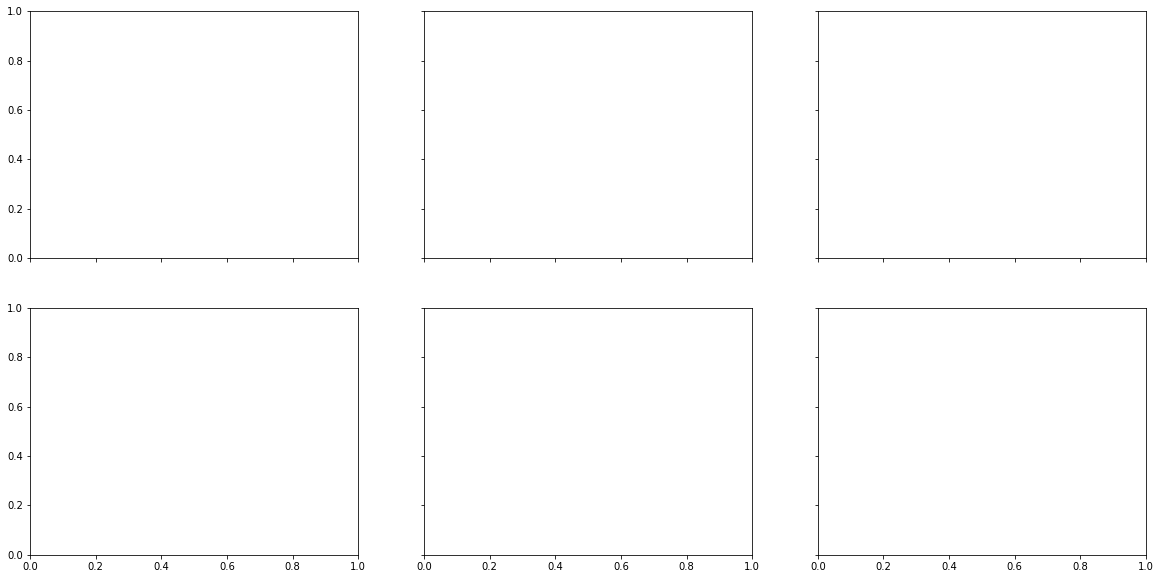

In [45]:
fig, axes = plt.subplots(2,3, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()